In [2]:
import cv2
import numpy as np

img = cv2.imread('test.png', -1)
img  = cv2.resize(img, (256, 256))

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)

True

In [3]:
img = cv2.imread("test.png")
def shadow_remove(img):
    rgb_planes = cv2.split(img)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadowremov = cv2.merge(result_norm_planes)
    return shadowremov
#Shadow removal
shad = shadow_remove(img)
cv2.imwrite('after_shadow_remove1.jpg', shad)

True

Read the image test.png


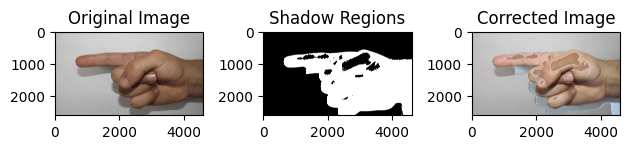

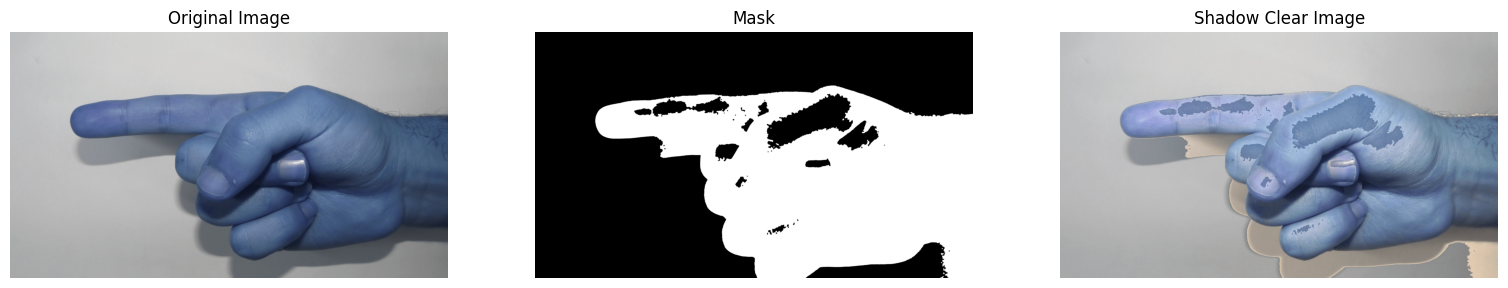

In [8]:
# from shadowRemove import process_image_file
from commonFunctions import *
org_image, mask, shadow_clear = process_image_file("test.png")
show_images([org_image, mask, shadow_clear], ["Original Image", "Mask", "Shadow Clear Image"])


Read the image ../Dataset_0-5/men/1/1_men (109).JPG


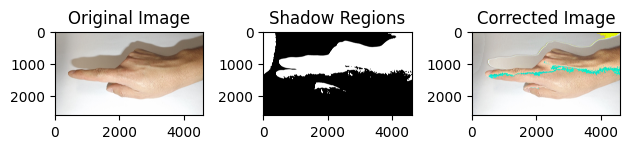

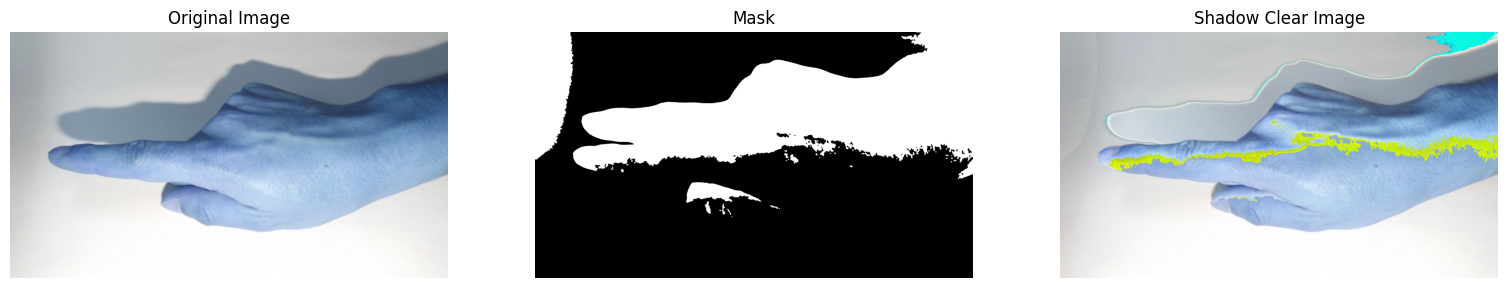

In [9]:
org_image, mask, shadow_clear = process_image_file('../Dataset_0-5/men/1/1_men (109).JPG')
show_images([org_image, mask, shadow_clear], ["Original Image", "Mask", "Shadow Clear Image"])

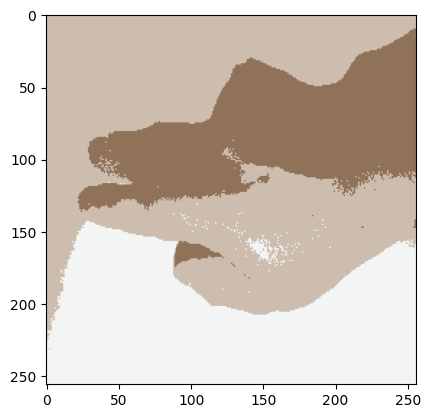

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

img = cv2.imread('../Dataset_0-5/men/1/1_men (109).JPG')
img  = cv2.resize(img, (256, 256))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = image.reshape((-1,3)) # numpy reshape operation -1 unspecified 

# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

#criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
  
# Choosing number of cluster
k = 3

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
  
# convert data into 8-bit values 
centers = np.uint8(centers) 

segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)

# reshape data into the original image dimensions 
segmented_image = segmented_data.reshape((image.shape)) 
  
plt.imshow(segmented_image)

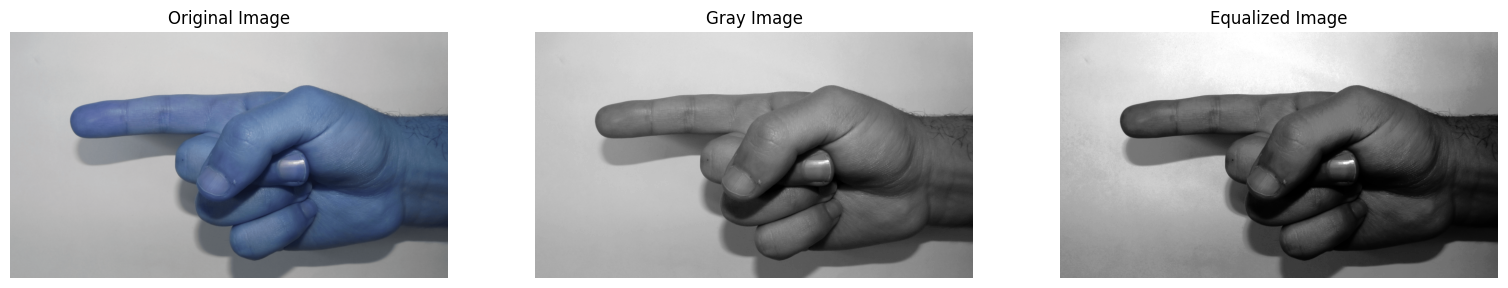

In [18]:
import cv2

# Load an image
img = cv2.imread('test.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to the grayscale image
equalized = cv2.equalizeHist(gray)

show_images([img, gray, equalized], ["Original Image", "Gray Image", "Equalized Image"])

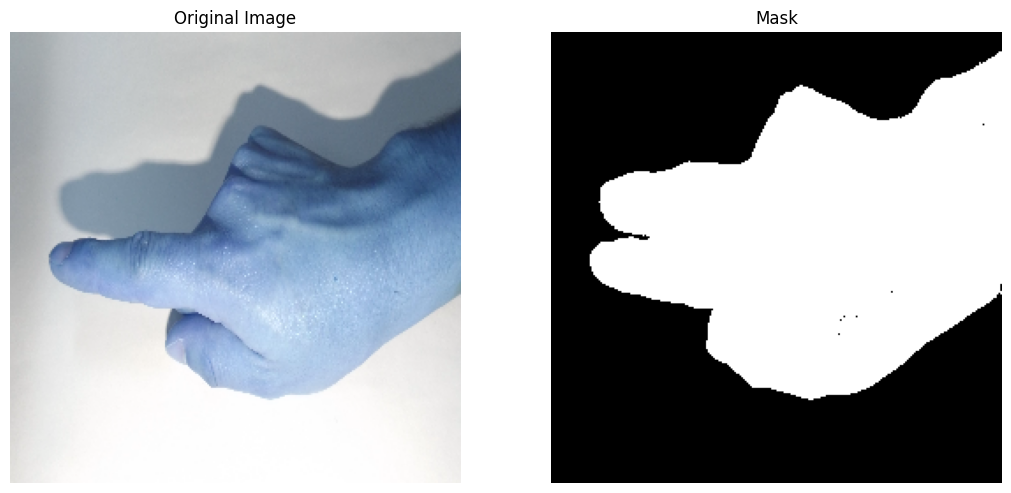

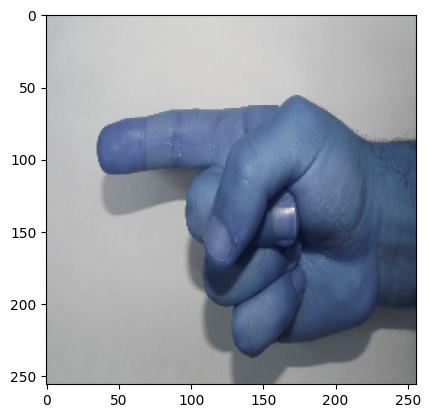

In [11]:
import cv2
import numpy as np
from commonFunctions import *
import matplotlib.pyplot as plt
img = cv2.imread('../Dataset_0-5/men/1/1_men (109).JPG')
img2 = cv2.imread('test.png')
img2 = cv2.resize(img2, (256, 256))
img3 = io.imread('test.png')[...,:3]
img  = cv2.resize(img, (256, 256))
# Convert ROI only to HSV format
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_color = np.array([0, 25, 70], dtype=np.uint8)
upper_color = np.array([20, 255, 255], dtype=np.uint8)

# Create a mask
mask = cv2.inRange(hsv, lower_color, upper_color)

show_images([img, mask], ["Original Image", "Mask"])
plt.imshow(img2)


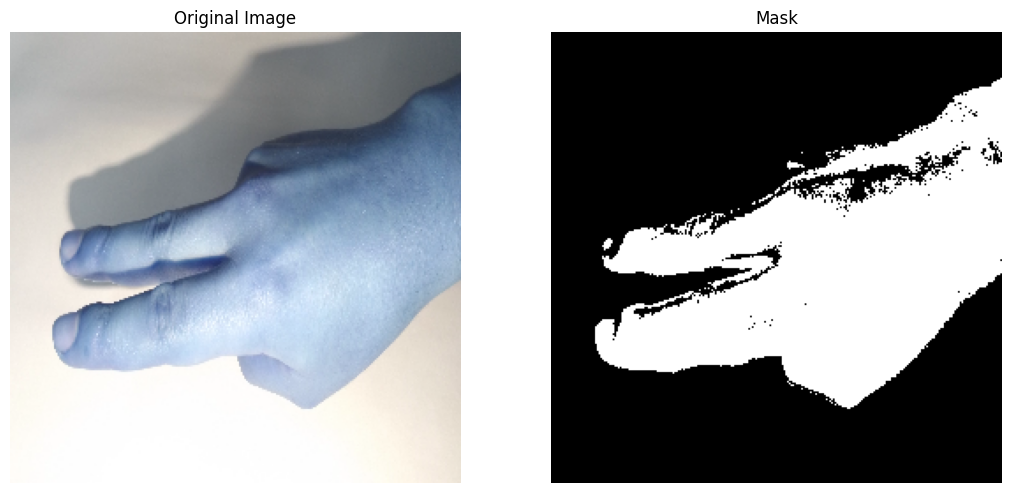

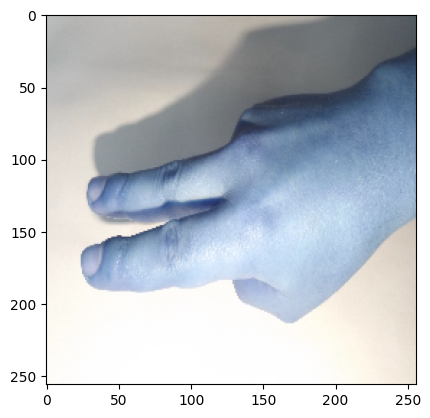

In [4]:
import cv2
import numpy as np
from commonFunctions import *

img = cv2.imread('test.png')
img2 = cv2.imread('../Dataset_0-5/men/2/2_men (115).JPG')
img2 = cv2.resize(img2, (256, 256))

img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)

# define lower and upper bounds for blue color in HLS format
# lower [0, 0, 50] and upper [20, 255, 255] are good
# lower [0, 0, 70] and upper [20, 255, 255] are is the best
lower_blue = np.array([0, 0, 65])
upper_blue = np.array([20, 255, 255])

# create a mask for blue color in HLS format
mask = cv2.inRange(img_hls, lower_blue, upper_blue)

# apply the mask to the original image
# result = cv2.bitwise_and(img, img, mask=mask)

show_images([img2, mask], ["Original Image", "Mask"])
plt.imshow(img2)